<a href="https://colab.research.google.com/github/zahidcv/OCT-Image-Denoising/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
noisy = r"C:\Users\HP\Documents\Zahid\OCT\demo\016 FAFSE n.jpg"
clean = r"C:\Users\HP\Documents\Zahid\OCT\demo\016 FAFSE.jpg"
fake = r"C:\Users\HP\Documents\Zahid\OCT\demo\GS, bce- 0.1, mse- 0.1, percep- 0.01, custom- 0 glr- 0.0001, dlr- 0.01, he, enc_batch, dcd_batch1.jpg"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import cv2
import torch

n= cv2.imread(noisy, 0)
n = cv2.resize(n, (960, 512))
c= cv2.imread(clean, 0)
c = cv2.resize(c, (960, 512))
f= cv2.imread(fake, 0)





plt.imshow(n, 'gray')

NameError: ignored

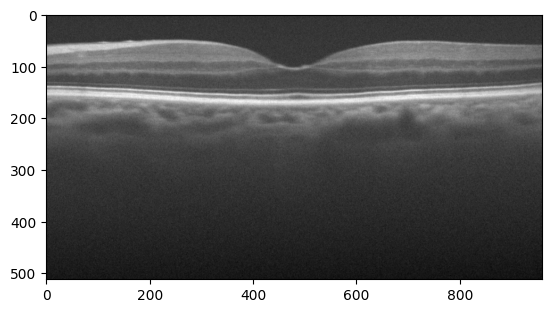

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(c, 'gray')

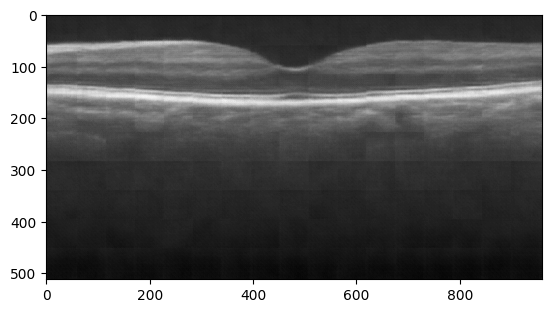

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(f, 'gray')

In [ ]:
from skimage.metrics import structural_similarity as SSIM
SSIM(f,c)

0.7270980938889539

In [ ]:
from math import log10,sqrt
def PSNR(original, compressed):
    mse = torch.mean((torch.sub(original, compressed)) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = torch.max(original)
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
# from bm3d import bm3d
# # for i in range(50):
# denoised_img = bm3d(n, 30)
# plt.imshow(denoised_img, 'gray')
# print(SSIM(denoised_img,c))
# print(PSNR(torch.from_numpy(c), torch.from_numpy(denoised_img)))


In [ ]:
SSIM(f, c)

0.7270980938889539

In [ ]:
print(PSNR(torch.from_numpy(f).float(), torch.from_numpy(c).float()))

27.266348204095685


In [ ]:
type(torch.from_numpy(f))


torch.Tensor

In [ ]:
type(torch.from_numpy(c))

torch.Tensor

In [ ]:
!pip install bm3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import bm3d
import cv2
# Load the noisy and noise-free images

n = cv2.imread("/content/016 FAFSE n.jpg",0)
c = cv2.imread("/content/016 FAFSE.jpg",0)

noisy_image = n
noise_free_image = c
print(n.shape)
# Denoise the noisy image using BM3D
denoised_image = bm3d.bm3d(n, sigma_psd=30/255, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

# Compute the SSIM and PSNR between the denoised image and the noise-free image
ssim_value = ssim(noise_free_image, denoised_image, data_range=denoised_image.max() - denoised_image.min())
psnr_value = psnr(noise_free_image, denoised_image, data_range=denoised_image.max() - denoised_image.min())

print(f'SSIM: {ssim_value:.4f}')
print(f'PSNR: {psnr_value:.2f}')


(450, 900)
SSIM: 0.0885
PSNR: 16.98


In [ ]:
import cv2
import torch
noisy = cv2.imread("/content/016 FAFSE n.jpg", 0)
noisy = cv2.resize(noisy, (960, 512))
clean = cv2.imread("/content/016 FAFSE.jpg", 0)
clean = cv2.resize(clean, (960, 512))
fake1 = cv2.imread("/content/GS, bce- 0.1, mse- 0.1, percep- 0.01, custom- 0 glr- 0.0001, dlr- 0.01, he, enc_batch, dcd_batch1.jpg", 0)
fake2 = cv2.imread("/content/GS, bce- 0.1, mse- 0.1, percep- 0.01, custom- 0 glr- 0.0001, dlr- 0.01, he, enc_batch, dcd_batch1.jpg", 0)


noisy_t = torch.from_numpy(noisy).float()
clean_t = torch.from_numpy(clean).float()
fake1_t = torch.from_numpy(fake1).float()
fake2_t = torch.from_numpy(fake2).float()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

class PerceptualLoss(nn.Module):
    def __init__(self, layers=[4, 9, 18, 27, 36]):
        super(PerceptualLoss, self).__init__()
        self.layers = layers
        self.vgg19 = models.vgg19(weights='DEFAULT').features
        self.mean = torch.tensor([0.485, 0.456, 0.406]).view(1, -1, 1, 1)
        self.std = torch.tensor([0.229, 0.224, 0.225]).view(1, -1, 1, 1)

    def normalize(self, x):
        return (x - self.mean) / self.std

    def get_features(self, x):
        features = []
        print(type(x))
        for i, module in enumerate(self.vgg19.children()):
            x = module(x)
            if i in self.layers:
                features.append(x)
        return features

    def forward(self, x, y):
        x = self.normalize(x)
        y = self.normalize(y)
        x_features = self.get_features(x)
        y_features = self.get_features(y)
        loss = 0
        for i in range(len(x_features)):
            loss += F.mse_loss(x_features[i], y_features[i])
        return loss


In [ ]:
perceptual_loss = PerceptualLoss()
perceptual_loss(clean_t, fake1_t)

<class 'torch.Tensor'>
<class 'torch.Tensor'>


tensor(83519.8594, grad_fn=<AddBackward0>)

In [ ]:
import torch 
from torch import nn
if torch.cuda.is_available():
    DEVICE = "cuda"
# elif torch.mps.backened.is_available():
#     DEVICE = "mps"
else:
    DEVICE = "cpu"


from torchvision import models 
vgg = models.vgg19(pretrained=True)
vgg.to(DEVICE)
vgg_features = vgg.features[:37].eval()
vgg_features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
vgg_features = vgg_features.to(DEVICE)
print(vgg_features)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
# print(noisy_t)
# print(b.dtype)


In [ ]:
from torch.nn import MSELoss
mse_loss = MSELoss()
fake_features = vgg_features(fake2_t.unsqueeze(dim=0))
real_features = vgg_features(noisy_t.unsqueeze(dim=0))
g_loss_perceptual = mse_loss(fake_features, real_features)
g_loss_perceptual

tensor(0.5937, grad_fn=<MseLossBackward0>)

In [ ]:
g_loss_perceptual

tensor(0., grad_fn=<MseLossBackward0>)

In [ ]:
from torch.nn import MSELoss
mse_loss = MSELoss()
fake_features = vgg_features(fake1_t.unsqueeze(dim=0))
print(fake_features.shape)
real_features = vgg_features(clean_t.unsqueeze(dim=0))
print(real_features.shape)
g_loss_perceptual = mse_loss(fake_features, real_features)
g_loss_perceptual

torch.Size([512, 16, 30])
torch.Size([512, 16, 30])


tensor(0.3809, grad_fn=<MseLossBackward0>)

In [ ]:
plt.imshow(noisy, 'gray')


NameError: ignored

In [ ]:
plt.imshow(clean, 'gray')


In [ ]:
plt.imshow(fake1, 'gray')

In [ ]:
perceptual_loss(torch.from_numpy(noisy), torch.from_numpy(clean))